In [1]:
getwd()

[1] "/mnt/md0/isshamie/Projects/Mito_Trace/R_scripts/annotations"

## Creates binarized Seurat objects, integrates conditions and annotates genes by nearby peaks

In [2]:
# Input info
# outdir =  "/home/isshamie/data/Projects/Mito_Trace/output/annotation/data/cd34norm/MTblacklist/mergedSamples/"
# sample_names = "Control,Flt3l"

outdir = "/data/Mito_Trace/output/pipeline/CHIP_nameFix_april08_2021/MTblacklist/data/annotation/mergedSamples"
sample_names = "Control,Flt3l,Input"


# Parameters
nTop = 25000
lsi_start_comp = 2
to.filt.cells = "TRUE"



## QC parameters
# min_peak_region_fragments=1000
# max_peak_region_fragments=10000
# min_pct_reads_in_peaks=20
# max_blacklist_ratio=0.05
# max_nucleosome_signal=15
# min_TSS_enrichment=0.2

min_peak_region_fragments=10
max_peak_region_fragments=15000
min_pct_reads_in_peaks=15
max_blacklist_ratio=0.05
max_nucleosome_signal=4
min_TSS_enrichment=0.2

cores = 24

#papermill -p cellr_in /data/Mito_Trace/output/pipeline/CHIP_nameFix_april08_2021/MTblacklist/data/annotation/mergedSamples -p outdir /data/Mito_Trace/output/pipeline/CHIP_nameFix_april08_2021/MTblacklist/data/annotation/mergedSamples -p sample_names Control,Flt3l,Input /mnt/md0/isshamie/Projects/Mito_Trace/R_scripts/annotations/integrateSignac.ipynb /data/Mito_Trace/output/pipeline/CHIP_nameFix_april08_2021/MTblacklist/data/annotation/mergedSamples/allSamples.integrated.ipynb


In [3]:
if ((to.filt.cells == "T") | (to.filt.cells == "TRUE")){
    to.filt.cells = TRUE
}else{to.filt.cells = FALSE}


In [4]:
library(repr)
options(repr.plot.width=12, repr.plot.height=12)

In [5]:
sample_names <- unlist(strsplit(sample_names, ","))
sample_names

[1] "Control" "Flt3l"   "Input"

In [6]:
library(GenomicRanges)
library(Seurat)
library(Signac)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(data.table)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library("patchwork")
library(future)
library(Rsamtools)


plan("multiprocess", workers = cores)
options(future.globals.maxSize = 8000 * 1024^2)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
#plan("multiprocess", workers = workers)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Attaching SeuratObject

Loading required package: ensembldb

Loading required package: GenomicFeatures

Loading required pa

In [7]:
allSE <- readRDS(file.path(outdir, paste0("allSamples.rds")))

In [8]:
allSE

[[1]]
An object of class Seurat 
80277 features across 222 samples within 1 assay 
Active assay: ATAC (80277 features, 0 variable features)

[[2]]
An object of class Seurat 
100522 features across 743 samples within 1 assay 
Active assay: ATAC (100522 features, 0 variable features)

[[3]]
An object of class Seurat 
187490 features across 5312 samples within 1 assay 
Active assay: ATAC (187490 features, 0 variable features)


## Filter cells if parameters there

In [9]:
filtCells <- function(se, min_peak_region_fragments=10,
                      max_peak_region_fragments=15000,
                     min_pct_reads_in_peaks=15,
                     max_blacklist_ratio=0.05,
                     max_nucleosome_signal=4,
                     min_TSS_enrichment=2){
    print('se before filt')
    print(se)
    se <- subset(
      x = se,
      subset = peak_region_fragments > min_peak_region_fragments &
               peak_region_fragments < max_peak_region_fragments &
               pct_reads_in_peaks > min_pct_reads_in_peaks &
               blacklist_ratio < max_blacklist_ratio &
               nucleosome_signal < max_nucleosome_signal  &
               TSS.enrichment > min_TSS_enrichment
    )
    print('se after filt')
    print(se)
        return(se)
}

In [10]:
if (to.filt.cells){
    allSE <- lapply(allSE, filtCells,
                    min_peak_region_fragments=min_peak_region_fragments,
                    max_peak_region_fragments=max_peak_region_fragments,
                    min_pct_reads_in_peaks=min_pct_reads_in_peaks,
                    max_blacklist_ratio=max_blacklist_ratio,
                    max_nucleosome_signal=max_nucleosome_signal,
                    min_TSS_enrichment=min_TSS_enrichment)
}

[1] "se before filt"
An object of class Seurat 
80277 features across 222 samples within 1 assay 
Active assay: ATAC (80277 features, 0 variable features)
[1] "se after filt"
An object of class Seurat 
80277 features across 111 samples within 1 assay 
Active assay: ATAC (80277 features, 0 variable features)
[1] "se before filt"
An object of class Seurat 
100522 features across 743 samples within 1 assay 
Active assay: ATAC (100522 features, 0 variable features)
[1] "se after filt"
An object of class Seurat 
100522 features across 569 samples within 1 assay 
Active assay: ATAC (100522 features, 0 variable features)
[1] "se before filt"
An object of class Seurat 
187490 features across 5312 samples within 1 assay 
Active assay: ATAC (187490 features, 0 variable features)
[1] "se after filt"
An object of class Seurat 
187490 features across 5289 samples within 1 assay 
Active assay: ATAC (187490 features, 0 variable features)


In [11]:
allSE

[[1]]
An object of class Seurat 
80277 features across 111 samples within 1 assay 
Active assay: ATAC (80277 features, 0 variable features)

[[2]]
An object of class Seurat 
100522 features across 569 samples within 1 assay 
Active assay: ATAC (100522 features, 0 variable features)

[[3]]
An object of class Seurat 
187490 features across 5289 samples within 1 assay 
Active assay: ATAC (187490 features, 0 variable features)


# Merge:
- get umap and clusters

In [12]:
# Add sample names to cell prefix here.
for (i in 1:length(allSE)){
    print(i)
    curr.SE <- allSE[[i]]
    allSE[[i]] <- RenameCells(allSE[[i]], add.cell.id=curr.SE$orig.ident[[1]])
}

[1] 1
[1] 2
[1] 3


In [13]:
allSE[[1]][["ATAC"]]

ChromatinAssay data with 80277 features for 111 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

In [14]:
# merge all datasets, adding a cell ID to make sure cell names are unique
# combined <- merge(
#   x = allSE[[1]],
#   y = unlist(allSE[2:length(allSE)]),
# )

combined <- merge(
  x = allSE[[1]],
  y = allSE[[2]])


if (length(sample_names) > 2) {
    for (i in 3:length(sample_names)){
        combined <- merge(x=combined,
                          y = allSE[[i]])
        }
}

In [15]:
combined <- FindTopFeatures(combined, min.cutoff = 20)
combined

An object of class Seurat 
189527 features across 5969 samples within 1 assay 
Active assay: ATAC (189527 features, 155527 variable features)

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



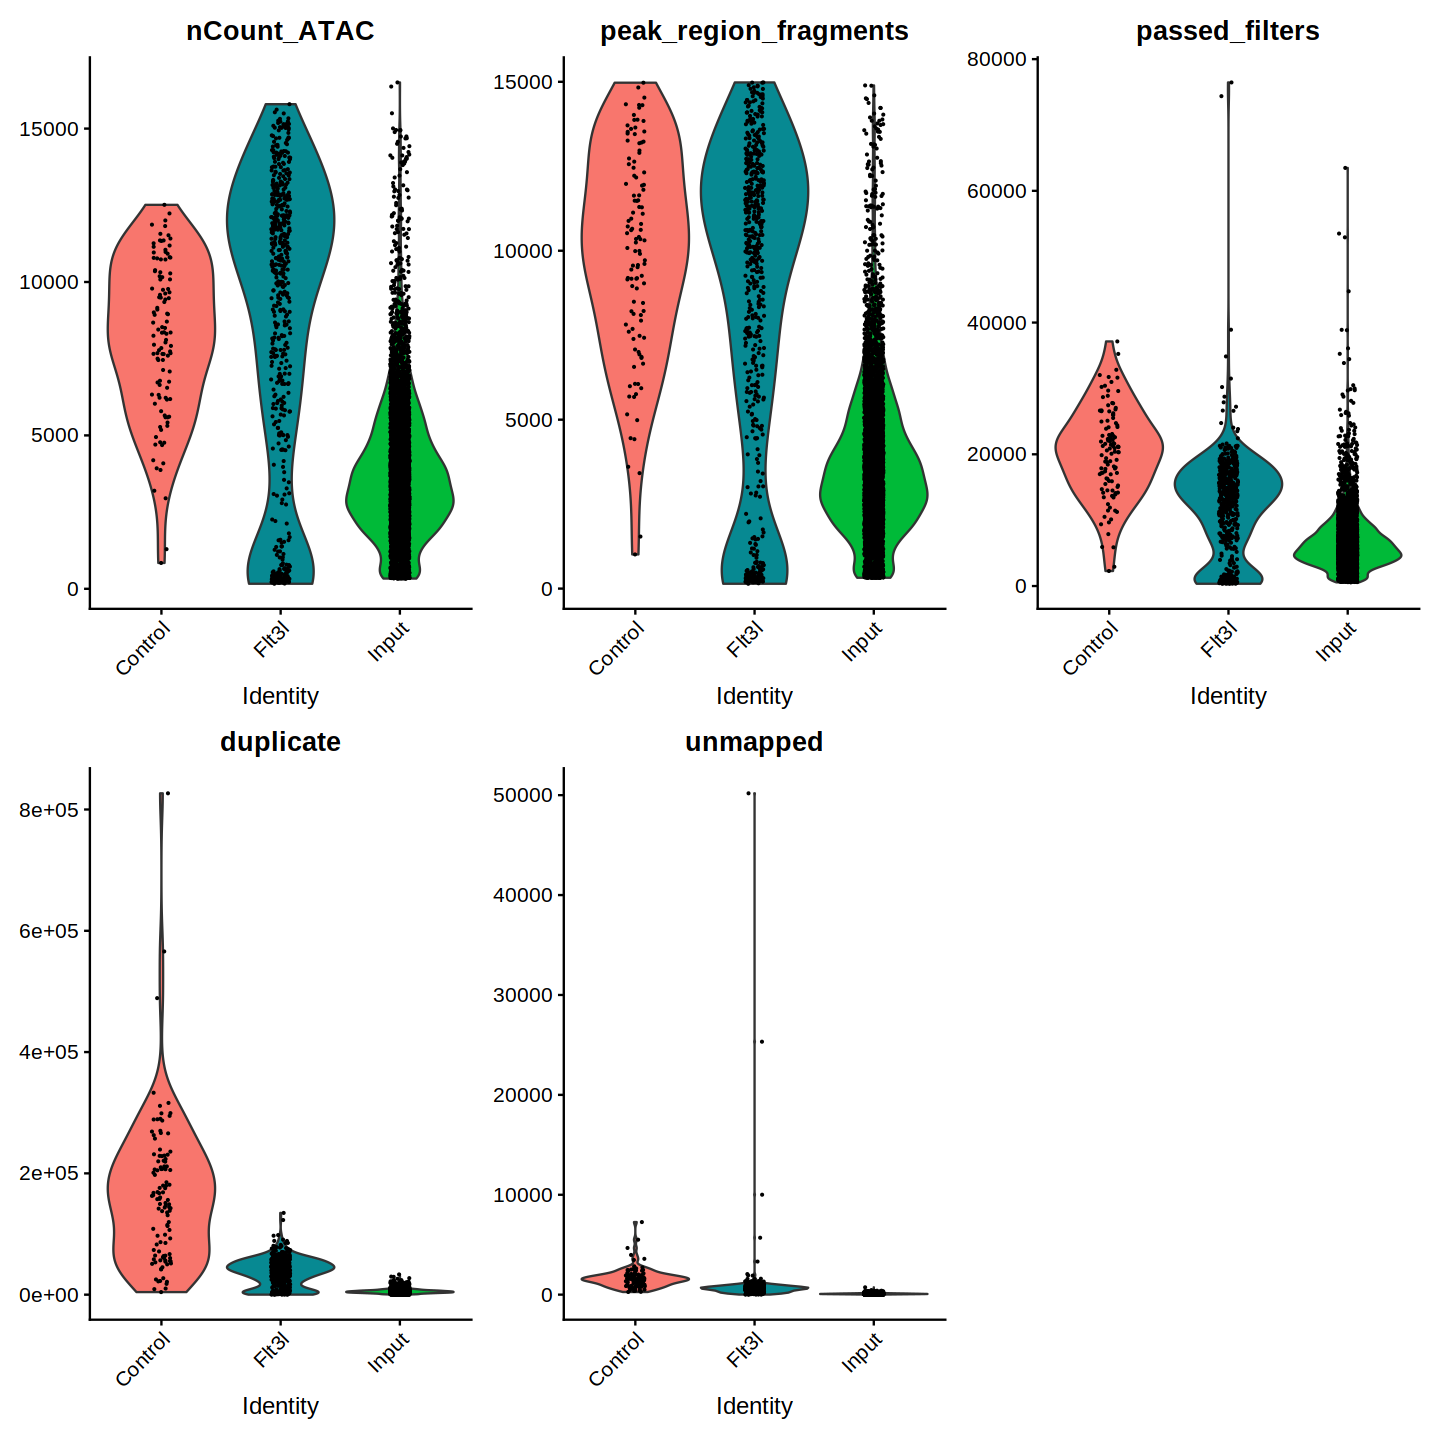

In [16]:
combined$orig.ident <- factor(combined$orig.ident, levels = sample_names)

VlnPlot(
  object = combined,
  features = c('nCount_ATAC', 'peak_region_fragments', 'passed_filters',
               'duplicate', 'unmapped'),
  split.by = "orig.ident",
  pt.size = 0.1,
  ncol = 3
)


Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
14:33:46 UMAP embedding parameters a = 0.9922 b = 1.112

14:33:46 Read 5969 rows and found 49 numeric columns

14:33:46 Using Annoy for neighbor search, n_neighbors = 30

14:33:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:33:47 Writing NN index file to temp file /tmp/RtmpCxh9xA/

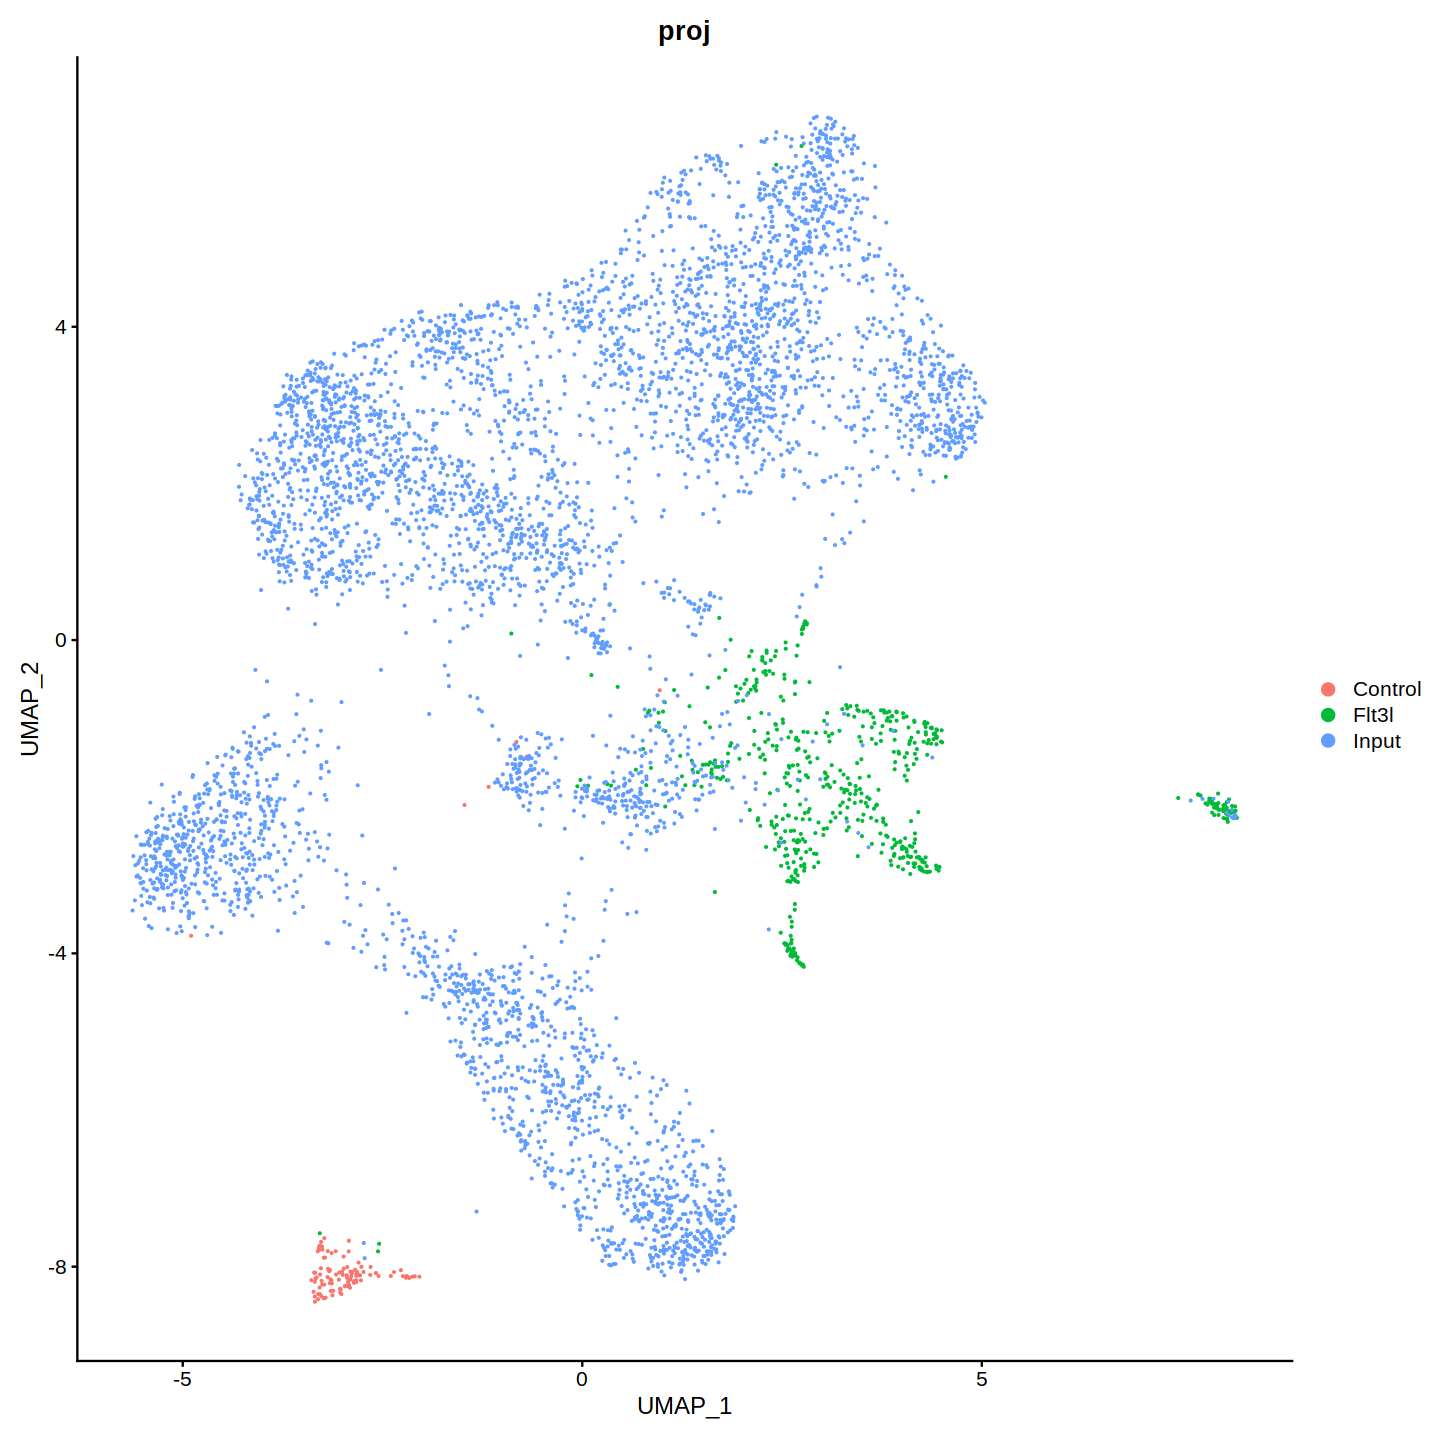

In [17]:
# Binarize and run LSI
combined <- BinarizeCounts(combined)
combined <- RunTFIDF(combined)
combined <- RunSVD(combined)
combined <- RunUMAP(combined, dims = lsi_start_comp:50, reduction = 'lsi')
DimPlot(combined, group.by = "proj", pt.size = 0.1)

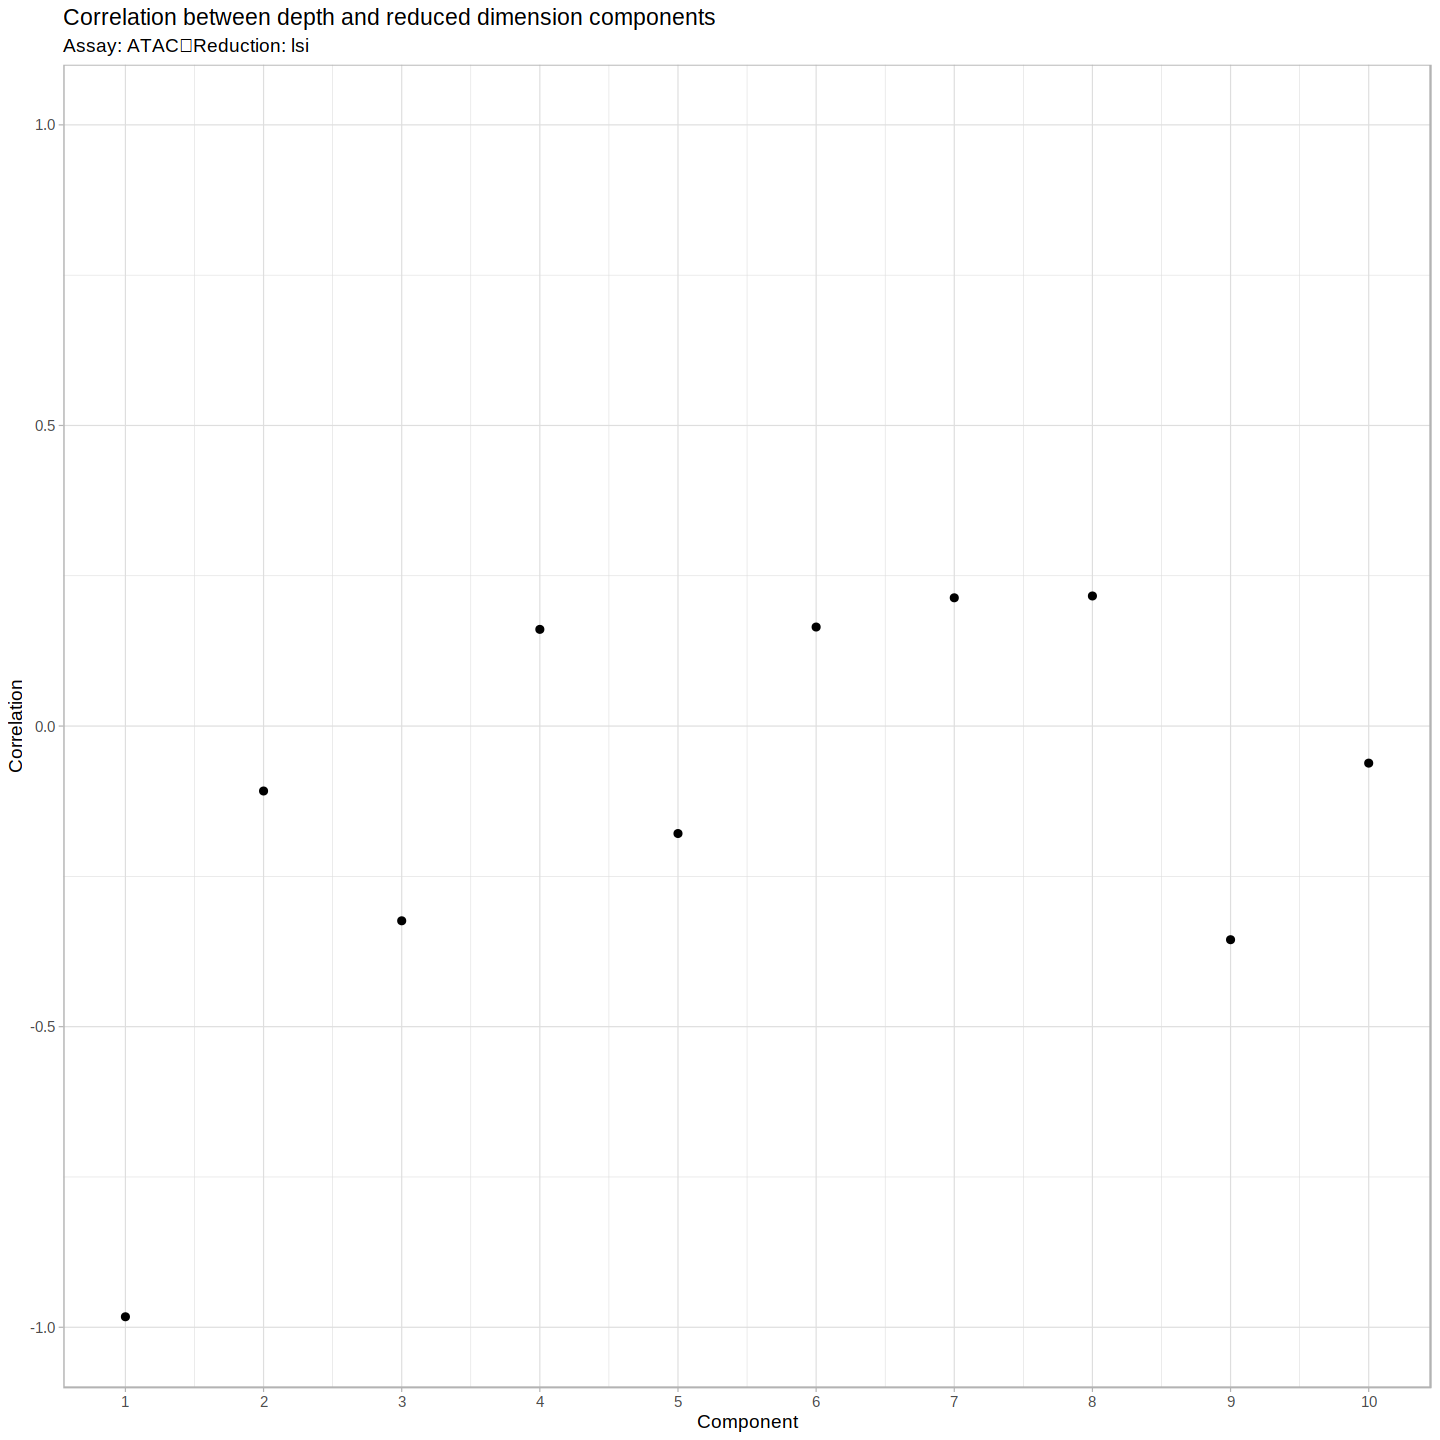

In [18]:
pDepthCorr <- DepthCor(combined)
pDepthCorr

In [19]:
allSE <- lapply(sample_names,  function(x) subset(combined, subset = orig.ident == x))
allSE

[[1]]
An object of class Seurat 
189527 features across 111 samples within 1 assay 
Active assay: ATAC (189527 features, 155527 variable features)
 2 dimensional reductions calculated: lsi, umap

[[2]]
An object of class Seurat 
189527 features across 569 samples within 1 assay 
Active assay: ATAC (189527 features, 155527 variable features)
 2 dimensional reductions calculated: lsi, umap

[[3]]
An object of class Seurat 
189527 features across 5289 samples within 1 assay 
Active assay: ATAC (189527 features, 155527 variable features)
 2 dimensional reductions calculated: lsi, umap


### Plot QC first

In [20]:
vPlot <- function(se){
      vPlot <- VlnPlot(
      object = se,
      features = c('pct_reads_in_peaks', 'peak_region_fragments',
                   'TSS.enrichment', 'blacklist_ratio', 'nucleosome_signal'),
      pt.size = 0.1,
      ncol = 5
    )  
    vPlot <- vPlot +    # Create grid of plots with title
             plot_annotation(title = se$orig.ident[[1]]) & 
             theme(plot.title = element_text(hjust = 0.5, size=15))
    #print(vPlot)
    return(vPlot)
}

qc <- function(se){
    # extract gene annotations from EnsDb
    annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v75)

    # change to UCSC style since the data was mapped to hg19
    seqlevelsStyle(annotations) <- 'UCSC'
    genome(annotations) <- "hg38"
    # add the gene information to the object
    Annotation(se) <- annotations
    gene.activities <- GeneActivity(se)
    # compute nucleosome signal score per cell
    se <- NucleosomeSignal(object = se)
    
    Annotation(se) <- annotations
    # compute TSS enrichment score per cell
    se <- TSSEnrichment(object = se, fast = FALSE)

    # add blacklist ratio and fraction of reads in peaks
    se$pct_reads_in_peaks <- se$peak_region_fragments / se$passed_filters * 100
    se$blacklist_ratio <- se$blacklist_region_fragments / se$peak_region_fragments
    se$high.tss <- ifelse(se$TSS.enrichment > 2, 'High', 'Low')
    se$nucleosome_group <- ifelse(se$nucleosome_signal > 4, 'NS > 4', 'NS < 4')
    TSSPlot(se, group.by = 'high.tss') + NoLegend()
    ggsave(file=file.path(outdir, paste0("QC.TSS", se$orig.ident[[1]], ".png")))
    FragmentHistogram(object = se, group.by = 'nucleosome_group')
    ggsave(file=file.path(outdir, paste0("QC.FragHist", se$orig.ident[[1]], ".png")))
    return(se)
}


In [21]:
#ggsave(file.path(outdir, paste0("QC_02.pdf")))
allSE <- lapply(allSE, qc)
allSE
#ggsave(file.path(outdir,"integrated.batch.png"), dpi=300)


Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS

OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining 

[[1]]
An object of class Seurat 
189527 features across 111 samples within 1 assay 
Active assay: ATAC (189527 features, 155527 variable features)
 2 dimensional reductions calculated: lsi, umap

[[2]]
An object of class Seurat 
189527 features across 569 samples within 1 assay 
Active assay: ATAC (189527 features, 155527 variable features)
 2 dimensional reductions calculated: lsi, umap

[[3]]
An object of class Seurat 
189527 features across 5289 samples within 1 assay 
Active assay: ATAC (189527 features, 155527 variable features)
 2 dimensional reductions calculated: lsi, umap


# Integrate

In [22]:
# find integration anchors
integration.anchors <- FindIntegrationAnchors(
  object.list = allSE, #c(ext,curr),
  anchor.features = allSE[[1]], #rownames(ext),
  reduction = "rlsi",
  dims = lsi_start_comp:30
)

# integrate LSI embeddings
integrated <- IntegrateEmbeddings(
  anchorset = integration.anchors,
  reductions = combined[["lsi"]],
  new.reduction.name = "integrated_lsi",
  dims.to.integrate = 1:30
)



Computing within dataset neighborhoods

Finding all pairwise anchors

Warning message:
"No filtering performed if passing to data rather than counts"
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 115 anchors

Warning message:
"No filtering performed if passing to data rather than counts"
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 447 anchors

Warning message:
"No filtering performed if passing to data rather than counts"
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 352 anchors

Merging dataset 1 into 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 3 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



## Run UMAP and plot

In [23]:
p1 <- DimPlot(combined, group.by = "proj")

17:28:08 UMAP embedding parameters a = 0.9922 b = 1.112

17:28:08 Read 5969 rows and found 29 numeric columns

17:28:08 Using Annoy for neighbor search, n_neighbors = 30

17:28:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:28:09 Writing NN index file to temp file /tmp/RtmpCxh9xA/filea4da72e9a2a23

17:28:09 Searching Annoy index using 24 threads, search_k = 3000

17:28:09 Annoy recall = 100%

17:28:11 Commencing smooth kNN distance calibration using 24 threads

17:28:14 Initializing from normalized Laplacian + noise

17:28:14 Commencing optimization for 500 epochs, with 250098 positive edges

17:28:24 Optimization finished

Saving 6.67 x 6.67 in image



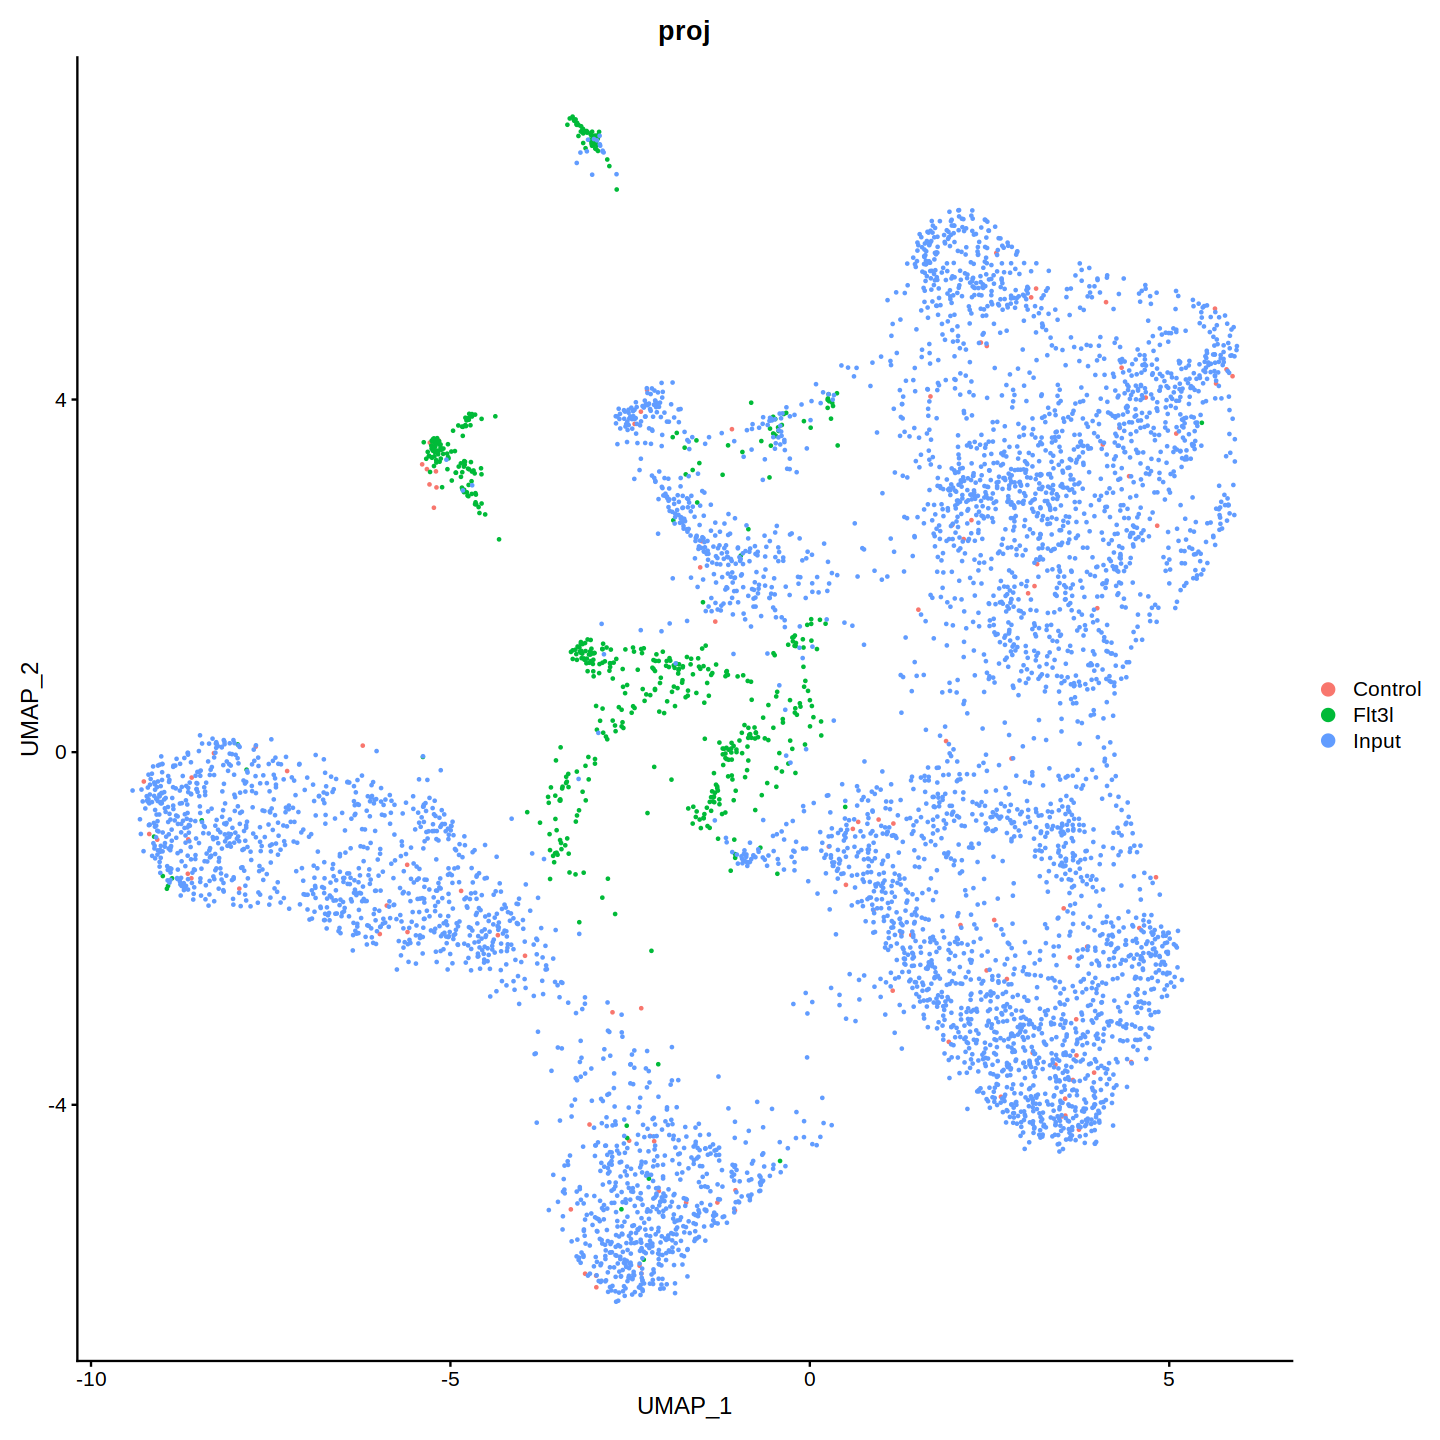

In [24]:
# create a new UMAP using the integrated embeddings
integrated <- RunUMAP(integrated, reduction = "integrated_lsi", dims = 2:30)
p2 <- DimPlot(integrated, group.by = "proj")
ggsave(file.path(outdir,"integrated.batch.png"), dpi=300)
p2

### Compare merged and integrated

Saving 6.67 x 6.67 in image



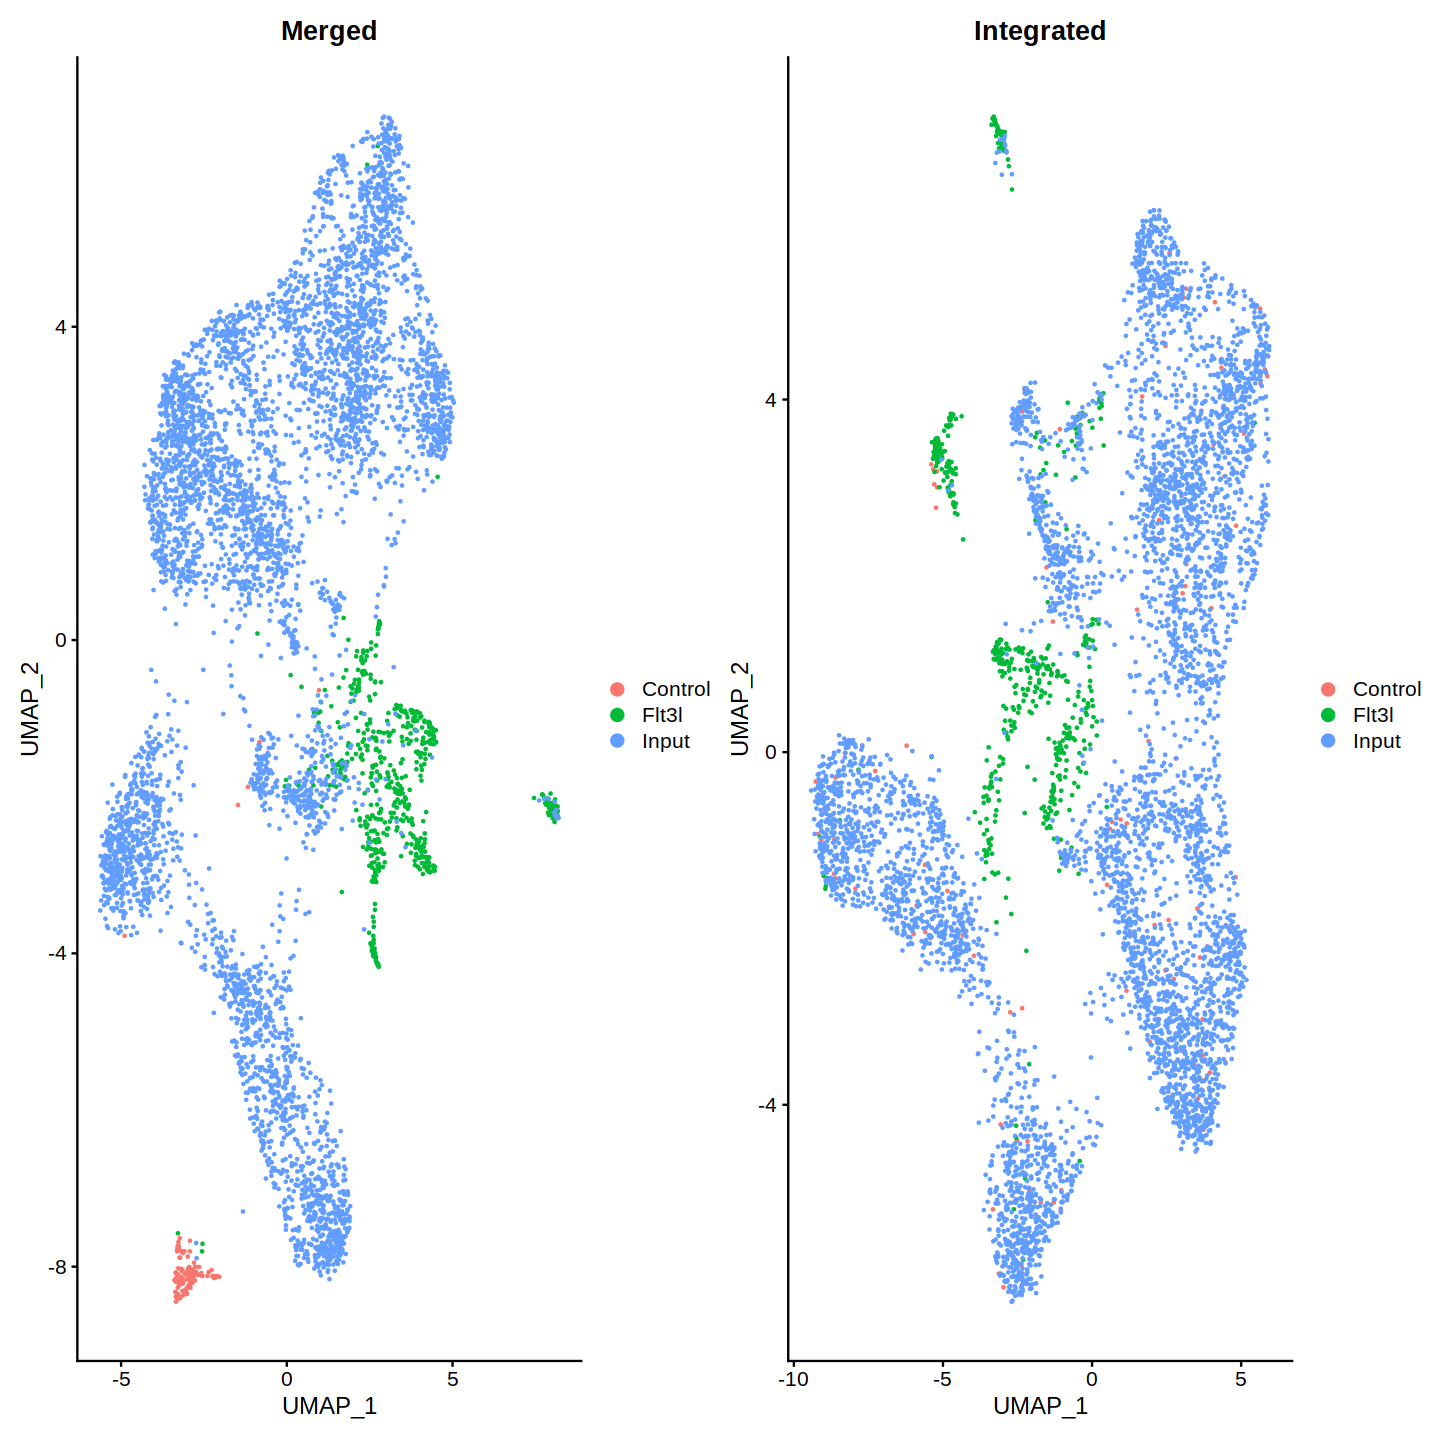

In [25]:
(p1 + ggtitle("Merged")) | (p2 + ggtitle("Integrated"))
ggsave(file.path(outdir,"integrated.merged.compare.png"), dpi=300)

## Correlation of LSI components and Depth

Saving 6.67 x 6.67 in image



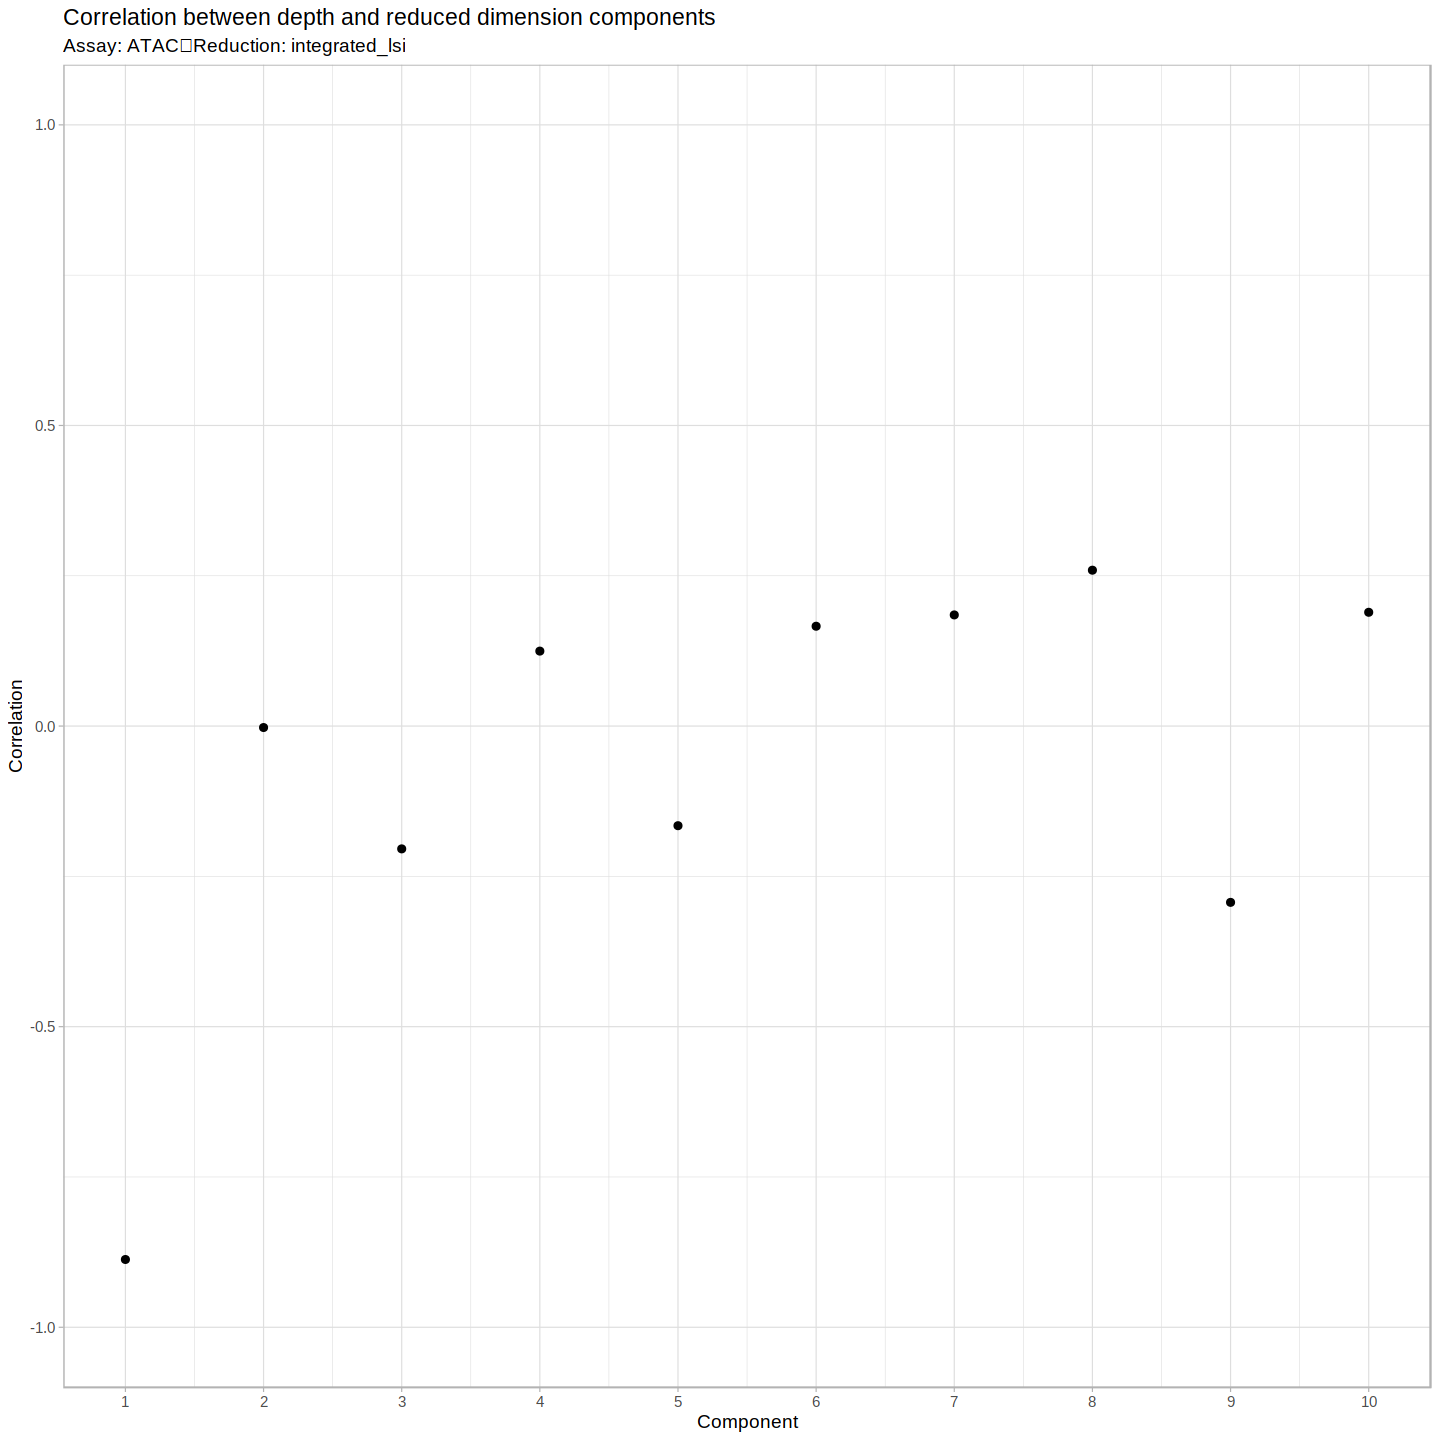

In [26]:
pDepthCorr <- DepthCor(integrated, reduction='integrated_lsi')
ggsave(file.path(outdir,"integrated.depthCor.png"), plot=pDepthCorr, dpi=300)

pDepthCorr

## Cluster and plot

Computing nearest neighbor graph

Computing SNN

Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_lapply-1') unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore"."
Saving 6.67 x 6.67 in image



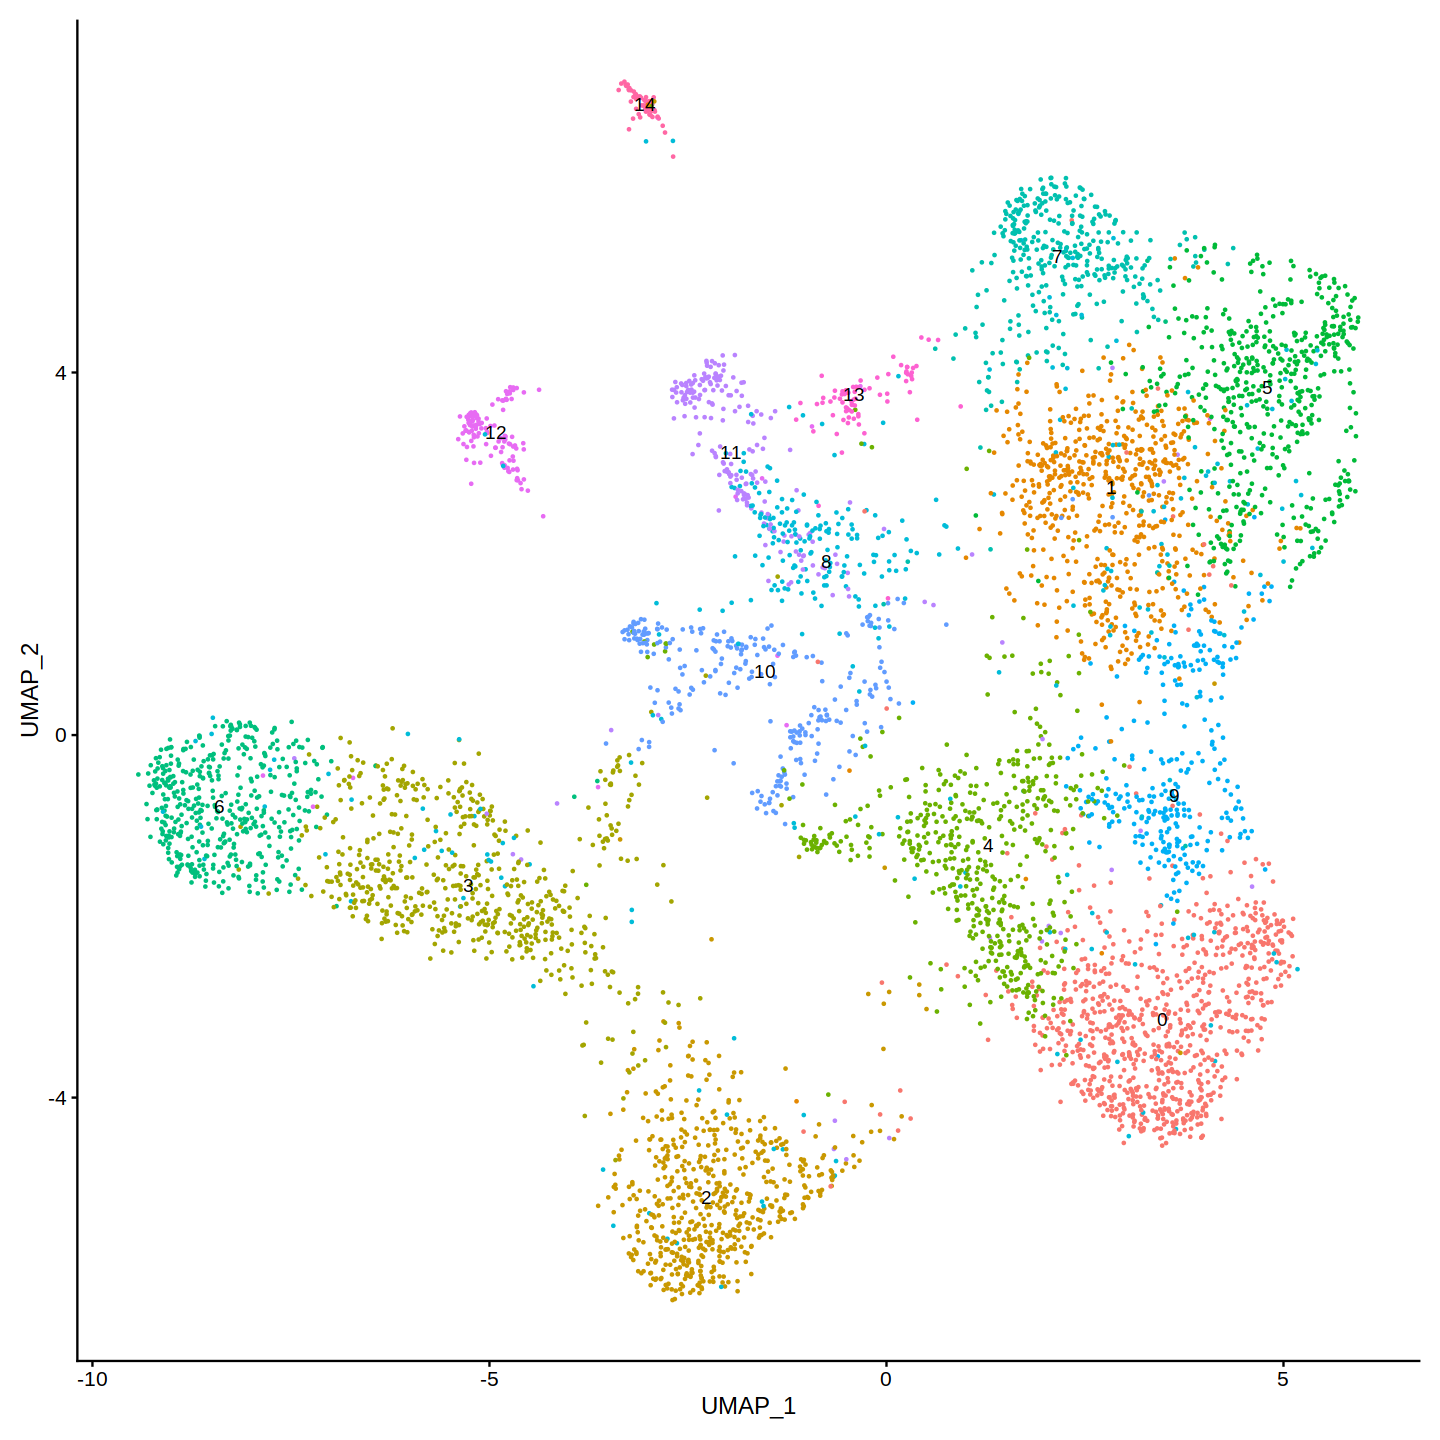

In [27]:
#integrated <- RunUMAP(object = integrated, reduction = 'integrated_lsi', dims = 2:30)
integrated <- FindNeighbors(object = integrated, reduction = 'integrated_lsi', dims = 2:30)
integrated <- FindClusters(object = integrated, verbose = FALSE, algorithm = 3)

pclust <- DimPlot(object = integrated, label = TRUE) + NoLegend()
ggsave(file.path(outdir, "integrated.lsi.clusters.png"), pclust)
pclust

## Get gene activity results 

In [28]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v75)

# change to UCSC style since the data was mapped to hg38
seqlevelsStyle(annotations) <- 'UCSC'
genome(annotations) <- "hg38"

# add the gene information to the object
Annotation(integrated) <- annotations


gene.activities <- GeneActivity(integrated)


Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

In [29]:
# add the gene activity matrix to the Seurat object as a new assay and normalize it
integrated[['RNA']] <- CreateAssayObject(counts = gene.activities)
integrated <- NormalizeData(
  object = integrated,
  assay = 'RNA',
  normalization.method = 'LogNormalize',
  scale.factor = median(integrated$nCount_RNA)
)

Warning message:
"Non-unique features (rownames) present in the input matrix, making unique"


In [30]:
DefaultAssay(integrated) <- 'RNA'

In [31]:
saveRDS(integrated, file.path(outdir, paste0("allSamples.integrated.rds")))

Saving 6.67 x 6.67 in image



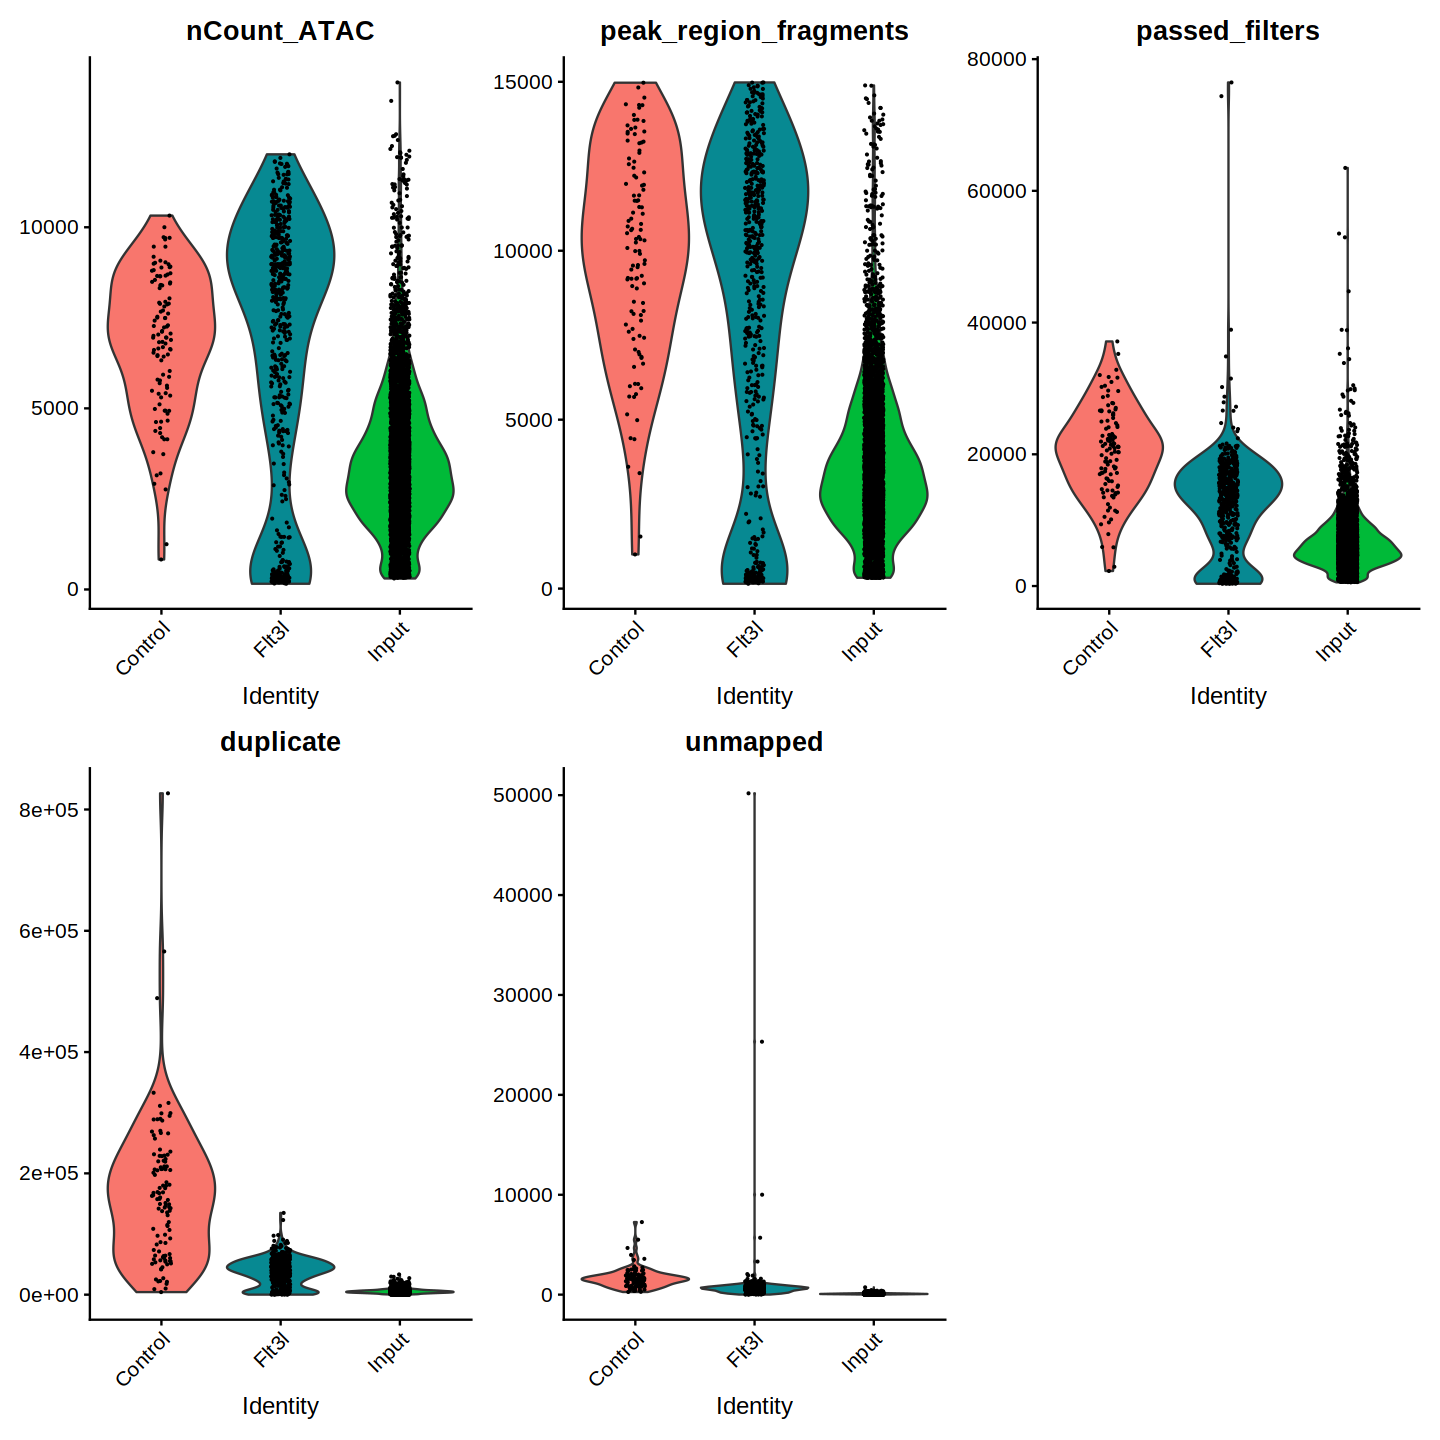

In [32]:
Idents(integrated) <- "orig.ident"
VlnPlot(
  object = integrated,
  features = c('nCount_ATAC', 'peak_region_fragments', 'passed_filters',
               'duplicate', 'unmapped'),
  split.by = "orig.ident",
  pt.size = 0.1,
  ncol = 3
)

ggsave(file.path(outdir, paste0("QC_02.png")))

In [33]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/isaac/miniconda3/envs/mttrace/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] Rsamtools_2.10.0          Biostrings_2.62.0        
 [3] XVector_0.34.0            future_1.23.0            
 [5] dplyr_1.0.7               metap_1.1                
 [7] cowplot_1.1.1             magrittr_2.0.1           
 [9] data.table_1.14.2         patchwork_1.1.1          
[11] 